<a href="https://colab.research.google.com/github/akppan/ml_practice/blob/master/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv("/content/SMSSpamCollection.csv")
df.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
length_of_text = []
for i in range(len(df)):
    length_of_text.append(len(df.loc[i]['Message']))

In [0]:
df = df.assign(Length_Of_Text = length_of_text)

In [0]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))

In [0]:
from math import sqrt

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)

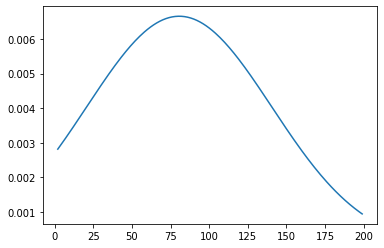

In [0]:
# pdf and cdf for a normal distribution
from scipy.stats import norm
from matplotlib import pyplot
# define distribution parameters
mu = mean(df["Length_Of_Text"])
sigma = stdev(df["Length_Of_Text"])
# create distribution
dist = norm(mu, sigma)
# plot pdf
values = [value for value in range(min(df["Length_Of_Text"]), 200)]
probabilities = [dist.pdf(value) for value in values]
pyplot.plot(values, probabilities)
pyplot.show()
# plot cdf
#cprobs = [dist.cdf(value) for value in values]
#pyplot.plot(values, cprobs)
#pyplot.show()


In [0]:
word_count = []
for i in range(len(df)):
    word_count.append(len((df.loc[i]['Message']).split()))
df = df.assign(word_count = word_count)

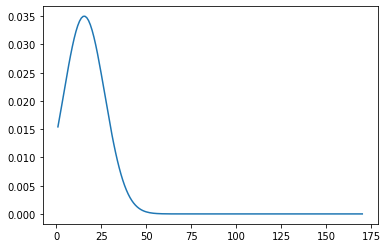

In [0]:
from scipy.stats import norm
from matplotlib import pyplot
# define distribution parameters
mu = mean(df["word_count"])
sigma = stdev(df["word_count"])
# create distribution
dist = norm(mu, sigma)
# plot pdf
values = [value for value in range(min(df["word_count"]), max(df["word_count"]))]
probabilities = [dist.pdf(value) for value in values]
pyplot.plot(values, probabilities)
pyplot.show()

In [0]:
#--------- EMAILS COUNT -------#
import re
#reg = r'[\w\.-]+@[\w\.-]+'
reg = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,}'
email_count = []
for i in range(len(df)):
    text = df.loc[i]['Message']
    matches = re.findall(reg, text)
    #print(matches)
    email_count.append(len(matches))
# print(email_count)
    
df = df.assign(email_count = email_count)

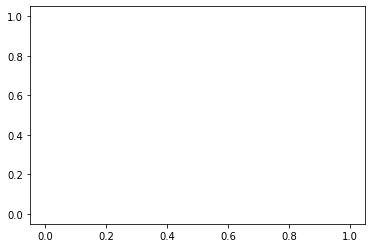

In [0]:
from scipy.stats import norm
from matplotlib import pyplot
# define distribution parameters
mu = mean(df["email_count"])
sigma = stdev(df["email_count"])
# create distribution
dist = norm(mu, sigma)
# plot pdf
values = [value for value in range(min(df["email_count"]), max(df["email_count"]))]
probabilities = [dist.pdf(value) for value in values]
pyplot.plot(values, probabilities)
pyplot.show()

In [0]:
numbers = ['0','1','2','3','4','5','6','7','8','9']
number_count = []
for i in range(len(df)):
    count=0
    for j in df.loc[i]['Message']:
        if(j in numbers):
            count += 1
    number_count.append(count)
df = df.assign(number_count = number_count)

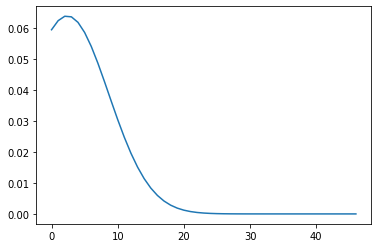

In [0]:
from scipy.stats import norm
from matplotlib import pyplot
# define distribution parameters
mu = mean(df["number_count"])
sigma = stdev(df["number_count"])
# create distribution
dist = norm(mu, sigma)
# plot pdf
values = [value for value in range(min(df["number_count"]), max(df["number_count"]))]
probabilities = [dist.pdf(value) for value in values]
pyplot.plot(values, probabilities)
pyplot.show()

In [0]:
letters = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','.',' ']
symbol_count = []
for i in range(len(df)):
    count=0
    for j in df.loc[i]['Message']:
        if(j not in numbers and j not in letters ):
            count += 1
    symbol_count.append(count)
df = df.assign(symbol_count = symbol_count)

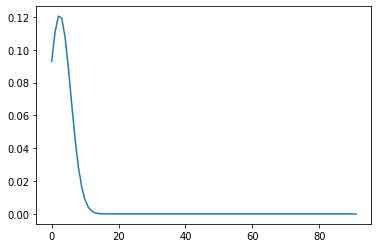

In [0]:
from scipy.stats import norm
from matplotlib import pyplot
# define distribution parameters
mu = mean(df["symbol_count"])
sigma = stdev(df["symbol_count"])
# create distribution
dist = norm(mu, sigma)
# plot pdf
values = [value for value in range(min(df["symbol_count"]), max(df["symbol_count"]))]
probabilities = [dist.pdf(value) for value in values]
pyplot.plot(values, probabilities)
pyplot.show()

In [0]:
upper_case_count = []
for i in range(len(df)):
    count=0
    for j in df.loc[i]['Message']:
        if(j.isupper()):
            count += 1
    upper_case_count.append(count)
df = df.assign(upper_case_count = upper_case_count)

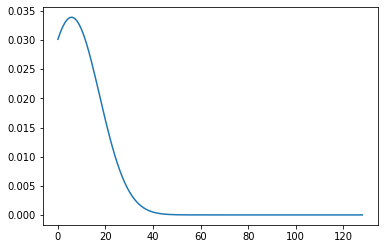

In [0]:
from scipy.stats import norm
from matplotlib import pyplot
# define distribution parameters
mu = mean(df["upper_case_count"])
sigma = stdev(df["upper_case_count"])
# create distribution
dist = norm(mu, sigma)
# plot pdf
values = [value for value in range(min(df["upper_case_count"]), max(df["upper_case_count"]))]
probabilities = [dist.pdf(value) for value in values]
pyplot.plot(values, probabilities)
pyplot.show()